# Coding project - Tumour segmentation

By Alexandre Achten - 000494484

December 2023

## Initialisation

(218, 180)


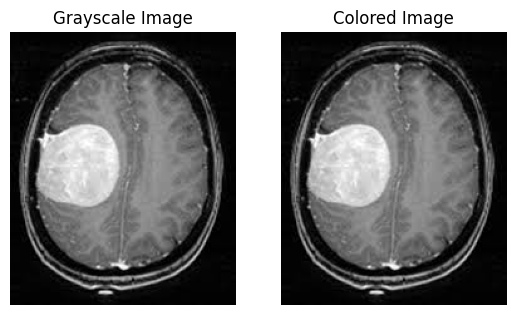

In [226]:
from skimage.io import imread,imshow
import matplotlib.pyplot as plt
from skimage.feature import canny
import numpy as np
from skimage.measure import label, regionprops,find_contours
import scipy.ndimage as ndi
%matplotlib inline

im = imread('mri_brain.jpg',as_gray=True) #read the image as grayscale for easier processing
im_color = imread('mri_brain.jpg') #read the image in color for later use
plt.figure()
plt.subplot(1,2,1)
plt.title('Grayscale Image')
plt.imshow(im,cmap='gray')
print(im.shape)
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Colored Image")
plt.imshow(im_color)
plt.axis('off')
plt.show()

## Canny filter

Now trying with the canny filter and the method for object features extraction (like the alphabetical letters in TP3):

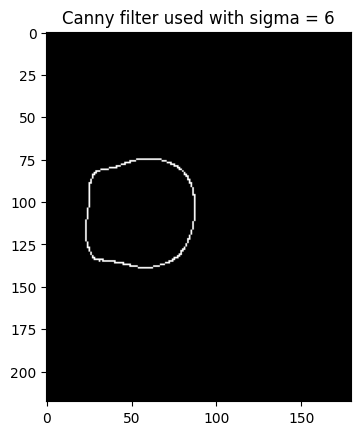

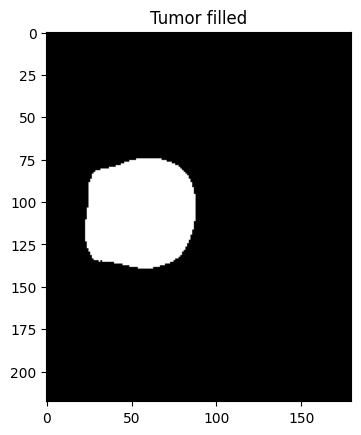

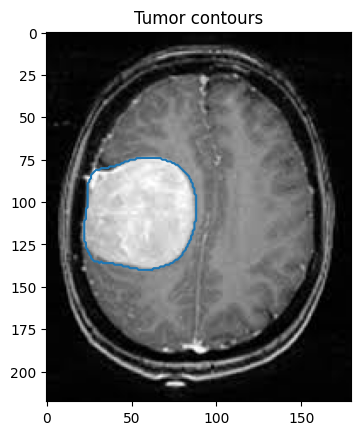

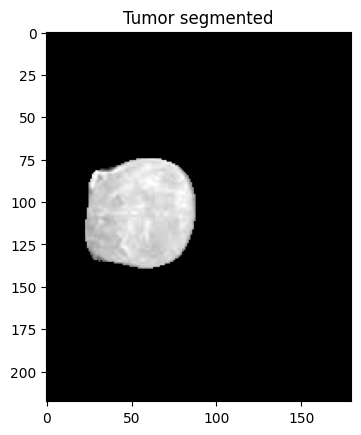

In [227]:
im = imread('mri_brain.jpg',as_gray=True)
sigma_val = 6
im_canny = canny(im, sigma=sigma_val)
plt.imshow(im_canny,cmap=plt.cm.gray)
plt.title('Canny filter used with sigma = '+str(sigma_val))
plt.show()

#The canny filter already make a cleaner image with the mean/median filter (the sigma we gave)

im_filled = ndi.binary_fill_holes(im_canny) #fill the holes
plt.imshow(im_filled,cmap=plt.cm.gray)
plt.title('Tumor filled')
plt.show()

contours = find_contours(im_filled, 0) # find all contours for the 0 gray level
plt.figure()
plt.imshow(im,cmap=plt.cm.gray)
plt.title('Tumor contours')
for i,c in enumerate(contours):
    plt.plot(c[:,1],c[:,0]) #plot the contour on the image pixel by pixel
    #select all x and y pixels of the contour with c[:,1] and c[:,0]
plt.show()

im_segmented = im*im_filled #segment the image
plt.imshow(im_segmented,cmap=plt.cm.gray)
plt.title('Tumor segmented')
plt.show()


Given that the resolution of the image is of 0.115 cm/px in both axis, we can calculate the area of the tumor by counting the number of pixels and multiplying it by the area of a pixel ($0.115^2 cm^2$).

In [228]:
label_image = label(im_filled) #label the tumor region
tumor = regionprops(label_image)
tumor_area = tumor[0]["area"]

print("Number of pixel in the tumor: ",tumor_area)
print("Tumor area: ",round(tumor_area*0.115*0.115,3),"cm²")

Number of pixel in the tumor:  3558.0
Tumor area:  47.055 cm²
